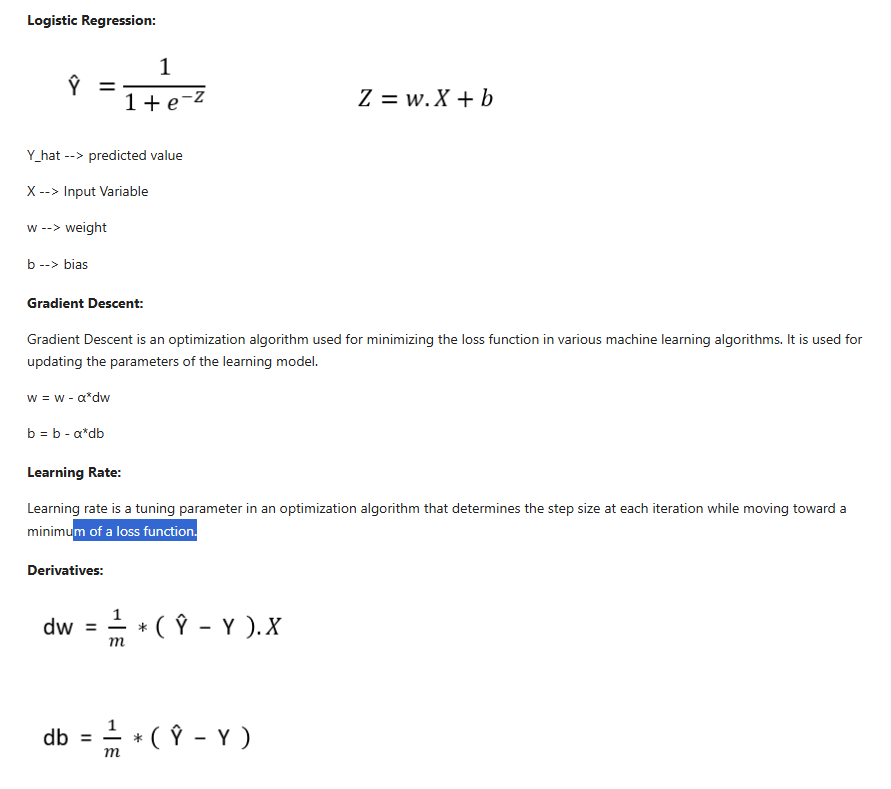

import numpy as np

class Logistic_Regression:
    """
    This class implements logistic regression using gradient descent.

    Hyperparameters:
    - learning_rate: Step size for each iteration to move toward the minimum loss.
    - no_of_iterations: Number of times the model goes through the entire dataset
      to update the weights and bias.
    """

    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        """
        Trains the logistic regression model on the given dataset.

        Parameters:
        - X: Feature matrix of shape (m, n)
        - Y: Target vector of shape (m,)
        """
        self.m, self.n = X.shape

        # Initialize weights and bias
        self.w = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        """
        Updates the weights and bias using gradient descent to minimize the loss function.
        """
        # Compute predictions
        z = self.X.dot(self.w) + self.b
        Y_hat = 1 / (1 + np.exp(-z))

        # Compute gradients
        dw = (1 / self.m) * np.dot(self.X.T, (Y_hat - self.Y))
        db = (1 / self.m) * np.sum(Y_hat - self.Y)

        # Update weights and bias
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def predict(self, X):
        """
        Predicts binary class labels for given input data.

        Parameters:
        - X: Input feature matrix

        Returns:
        - predictions: Vector of 0s and 1s based on sigmoid threshold 0.5
        """
        z = X.dot(self.w) + self.b
        Y_pred = 1 / (1 + np.exp(-z))
        return np.where(Y_pred > 0.5, 1, 0)


Importing Dependencies

In [158]:
# importing numpy library
import numpy as np

##Logistic Regression


In [159]:
# class Logistic_Regression():
#   """
#   We initiate the hyperparameters — such as learning rate and number of
#   iterations (or epochs) — to optimize the weights and bias, enabling our model
#   to train using the gradient descent algorithm with high accuracy.

#   learning rate :-> what should be the step size to be taken in next iteration
#   so that we moving towards minimum loss function.

#   No of epoche :-> the total no of time the model iterate over the entire
#   entire dataset to update the weights and bias of the model for minimum
#   loss function.

#   """
#   def __init__(self,learning_rate,no_of_iterations):
#     self.learning_rate = learning_rate
#     self.no_of_iterations = no_of_iterations

#   """
#   fiting features columns to the model for training so that model
#   can predict output.

#   (X,Y)

#   """
#   def fit(self,X,Y):
#     # no of training examples(no of rows) and no of features we can get from X
#     self.m,self.n = X.shape

#     #initalize the weight and bias
#     self.w = np.zeros(self.n) # [0,0,0..] w inital 0 for all n f  e atures
#     self.b = 0

#     self.X = X # input dataset
#     self.Y = Y # output data

#     # for each iteration predict the value and update the weights and bias

#     for i in range(self.no_of_iterations):
#       self.update_weights()

#   """
#   function to update weight in gradient descent for optimization for minimizing
#   loss function
#   w=w-alpha*dw
#   b=b-alpha*db

#   """
#   def update_weights(self):

#     # Y_hat formula(sigmoid function)
#     z = self.X.dot(self.w)+self.b # z=wx+b
#     Y_hat = 1/(1+np.exp(-(z))) # y=1/(1+e^(-z))

#     #gradient descent
#     dw = (1/self.m)*np.dot(self.X.T,(Y_hat-self.Y))
#     db = (1/self.m)*np.sum(Y_hat-self.Y)

#     #updating the weights and bias
#     self.w = self.w - self.learning_rate*dw
#     self.b = self.b - self.learning_rate*db


#   """
#   function to predict the output of the model
#   if we give all the features column of particular row then it predict the
#   output

#   """
#   def predict(self,X):
#     z = X.dot(self.w)+self.b # z=wx+b
#     Y_pred = 1/(1+np.exp(-(z))) # y=1/(1+e^(-z))
#     return np.where(Y_pred > 0.5, 1, 0)




#Work flow of the Logistic Regression model:

Step 1: Set Learnin Rate & Number Of Iterations Initiate Random weight and bias value.

Step 2: Build Regression Function. (sigmoid function)

Step 3: Update the parameters using gradient  descent

Finally we will get the best model (best weight and value) as it has COSt function.

Step 4: build the " predict" function to determine the Class Of the data point.

Importing Dependencies

In [160]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import Logistic_Regression

# Data collection and Analysis

PIMA Diabetes Dataset

In [161]:
# loading the diabetes dataset to a pandas dataframe
diabetes_dataset= pd.read_csv("/content/drive/MyDrive/datasets/diabetes.csv")

In [162]:
# printing first 5 rows of dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [163]:
# number of rows and columns in dataset
diabetes_dataset.shape

(768, 9)

In [164]:
# getting statistical measure of dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [165]:
# printing how many people are diabetic or not
diabetes_dataset.Outcome.value_counts()


,count
Outcome,
0,500
1,268


0 -> for Non Diabetic

1 -> for Diabetic



In [166]:
# checking any nul value present in dataset
diabetes_dataset.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [167]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [168]:
# separating the data and labels
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset.Outcome

In [169]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [170]:
Y.head()


,Outcome
0,1
1,0
2,1
3,0
4,1


# Data Standardization

as we see that in X the different columns values are disparites in value so we have to standardize it to make a common range

In [171]:
scaler = StandardScaler()

In [172]:
scaler.fit(X)

StandardScaler()

In [173]:
standardize_data = scaler.transform(X)# this will give numpy array

In [174]:
print(standardize_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [175]:
X = standardize_data
Y = diabetes_dataset.Outcome

In [176]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [177]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [178]:
print(type(Y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


train_test_split(X, Y, ...) accepts both:

NumPy arrays

Pandas DataFrames or Series



#Train Test Split

In [179]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

stratify is used to make distribution uniform on the basis of different class (i.e 0 for not diabetic, 1 for diabetic)

In [180]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [181]:
print(Y.shape,Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


#Training the model

In [182]:
classifier =Logistic_Regression.Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)

In [183]:
# training the Logistic model classifier
classifier.fit(X_train,Y_train)

#Model Evaluation

Accuracy Score on Training data



In [184]:
X_trainPrediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_trainPrediction)

In [185]:
print(training_data_accuracy)

0.7785016286644951


Accuracy Score on Test Data

In [186]:
X_testPrediction= classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_testPrediction,Y_test)

In [187]:
print(test_data_accuracy)

0.7597402597402597


Making Predictive System
insert all the parameter and predict the output and check from the original output

In [188]:
print(diabetes_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [189]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [190]:
data = diabetes_dataset.iloc[1]

In [191]:
print(data)
print(type (data))

Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64
<class 'pandas.core.series.Series'>


In [192]:
diabetes_dataset.iloc[:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [193]:
diabetes_dataset.iloc[1:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [194]:
diabetes_dataset.iloc[:,1]

,Glucose
0,148
1,85
2,183
3,89
4,137
...,...
763,101
764,122
765,121
766,126


In [195]:
diabetes_dataset.iloc[2,2]

np.int64(64)

In [196]:
 diabetes_dataset.iloc[0:5]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [197]:
single_data = diabetes_dataset.iloc[4]

In [198]:
print(single_data)

Pregnancies                   0.000
Glucose                     137.000
BloodPressure                40.000
SkinThickness                35.000
Insulin                     168.000
BMI                          43.100
DiabetesPedigreeFunction      2.288
Age                          33.000
Outcome                       1.000
Name: 4, dtype: float64


In [199]:
type(single_data)

pandas.core.series.Series

In [200]:
single_data = single_data.drop(columns='Outcome',axis=1)

In [201]:
print(single_data)

Pregnancies                   0.000
Glucose                     137.000
BloodPressure                40.000
SkinThickness                35.000
Insulin                     168.000
BMI                          43.100
DiabetesPedigreeFunction      2.288
Age                          33.000
Outcome                       1.000
Name: 4, dtype: float64


In [202]:
single_data = single_data.to_numpy(single_data)

In [203]:
print(single_data)

[  0.    137.     40.     35.    168.     43.1     2.288  33.      1.   ]


In [204]:
single_data = np.delete(single_data,-1)

In [205]:
print(single_data)
print(type(single_data))


[  0.    137.     40.     35.    168.     43.1     2.288  33.   ]
<class 'numpy.ndarray'>


reshape the array as we are predecting for one instance or one data or one row

In [206]:
input_data_reshape = single_data.reshape(1,-1)

In [207]:
print(input_data_reshape)

[[  0.    137.     40.     35.    168.     43.1     2.288  33.   ]]


In [208]:
type(input_data_reshape)

numpy.ndarray

Standardize the input

In [209]:
std_data = scaler.transform(input_data_reshape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [210]:
print(std_data)

[[-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [211]:
pred_value = classifier.predict(std_data)
print(pred_value)

[1]


In [212]:
if(pred_value==0):
  print("Non Diabetic")
else:
  print("Diabetic")

Diabetic
